In [1]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn import svm
#Normalise the data using sklearn library
from sklearn import preprocessing
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

c:\users\harish\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Load Training dataset

In [3]:
training_df = pd.read_csv('VMWareTrainingData.csv')

In [4]:

# training_df= training_df.reset_index()
training_df= training_df.drop('ID',axis=1)


In [5]:
training_df.head()

,tot_page_views,tot_page_views_l30d,tot_page_views_l90d,tot_visits,tot_visits_l30d,tot_visits_l90d,internal_search_events,buy_now_events,download_trial_events,support_search_events,...,ftr_growth_prodA_ent_12_13,ftr_growth_prodA_ent_plus_12_13,ftr_growth_prodA_5_x_13_14,ftr_growth_prodA_std_13_14,ftr_growth_prodA_ent_13_14,ftr_growth_prodA_ent_plus_13_14,ftr_growth_prodA_5_x_14_15,ftr_growth_prodA_std_14_15,ftr_growth_prodA_ent_14_15,ftr_growth_prodA_ent_plus_14_15
0,3,0,0,2,0,0,0,0,0,0,...,-1.0,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,1,0,0,1,0,0,0,0,0,0,...,-1.0,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,1,0,0,1,0,0,0,0,0,0,...,-1.0,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,2,0,0,2,0,0,0,0,0,0,...,-1.0,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,1,0,0,1,0,0,0,0,0,0,...,-1.0,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [6]:
training_df.shape

(99999, 383)

#### Below barplot shows that dataset is imbalanced

In [7]:
training_df['train_period_workstation_purchase_flag'].value_counts()

0    96499
1     3500
Name: train_period_workstation_purchase_flag, dtype: int64

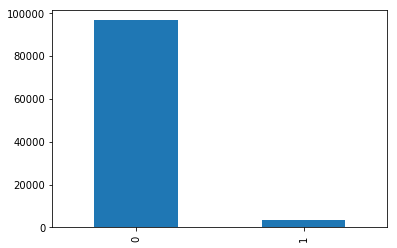

In [8]:
pd.value_counts(training_df['train_period_workstation_purchase_flag']).plot.bar()

#### Specify X and Y variables

In [285]:
# X = training_df.loc[:, training_df.columns != 'train_period_workstation_purchase_flag']
X = training_df[gbm_list]
y =training_df.loc[:,'train_period_workstation_purchase_flag']

In [10]:
feature_list = training_df.columns.tolist()

In [11]:
feature_list.remove('train_period_workstation_purchase_flag')
# feature_list.append('test_period_workstation_purchase_flag')

In [12]:
training_df.shape

(99999, 383)

### Load validation dataset

In [13]:
valid_df =pd.read_csv('IMB 621 VMW SERVER CASE VALIDATION DATA 28 MAY 2017.csv')

c:\users\harish\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (444,445,446,447,450,451,452,453,455,456,458,461,463,464,465,468,470,474,475,476,477,480,481,482,483,485,486,488,491,493,494,495,498,500,768) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
validation_df = valid_df[feature_list]

In [15]:
validation_df.shape

(49999, 382)

In [16]:
validation_df['channel_direct_total_pct'] = validation_df['channel_direct_total_pct'].apply(pd.to_numeric, errors='coerce')

c:\users\harish\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### Validation data preprocessing

In [83]:
[key for key in dict(validation_df.dtypes) if dict(validation_df.dtypes)[key] in ['object']]

[]

In [84]:
for col in validation_df:
    if sum(validation_df[col].isnull()) >=0:
        validation_df[col].fillna(validation_df[col].median(), inplace=True)

In [85]:
with pd.option_context('mode.use_inf_as_null', True):
#     validation_df = validation_df.dropna(how='all')

In [89]:
with pd.option_context('mode.use_inf_as_null', True):
    validation_df = validation_df.dropna(subset=['channel_web_total_pct'], how='all')

In [554]:
validation_df.to_csv('C:/Users/Harish/Desktop/BDA/Assignment_4/DATA SET/VMWareTrainingData_validation.csv',header='true',index='false')

#### lease run Validation dataset from here

In [13]:
validation_df = pd.read_csv('VMWareTrainingData_validation.csv')

In [14]:
validation_df.shape

(49998, 383)

In [286]:
# X_val = validation_df.loc[:, validation_df.columns != 'test_period_workstation_purchase_flag']

X_val = validation_df[gbm_list]

y_val =validation_df.loc[:,'test_period_workstation_purchase_flag']

### Split the training data in training and testing using cross validation techniques

In [287]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                     stratify=y, 
                                                     test_size=0.3)
# X_mod= np.array(X)
# y_mod=np.array(y)

In [288]:
from sklearn import cross_validation
skf = cross_validation.StratifiedKFold(y, n_folds=3,random_state=20)

for train_index, test_index in skf:
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_mod[train_index], X_mod[test_index]
    y_train, y_test = y_mod[train_index], y_mod[test_index]

### Normalizing the data

#### Using MinMaxScaler

In [289]:
#Normalise the data using sklearn library
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
# scaler = preprocessing.RobustScaler()
scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform( X_train )
X_test= scaler.transform( X_test)
X_val= scaler.transform( X_val)

training_df[training_df.columns]  = scaler.fit_transform(training_df[training_df.columns])

### Apply Resampling techniques

### Ensemble Balanced cascade

In [291]:
from imblearn.ensemble import BalancedBaggingClassifier 
from sklearn.metrics import confusion_matrix

In [300]:
bbc = BalancedBaggingClassifier(n_estimators =50,bootstrap=True,bootstrap_features=True,random_state=42)
bbc.fit(X_res, y_res) 

BalancedBaggingClassifier(base_estimator=None, bootstrap=True,
             bootstrap_features=True, max_features=1.0, max_samples=1.0,
             n_estimators=50, n_jobs=1, oob_score=False, random_state=42,
             ratio='auto', replacement=False, verbose=0, warm_start=False)

In [301]:
y_pred = bbc.predict(X_test)

In [302]:
y_pred_val = bbc.predict(X_val)

In [303]:
print(confusion_matrix(y_test, y_pred))

[[22987  5963]
 [  138   912]]


In [304]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        0.0       0.99      0.79      0.88     28950
        1.0       0.13      0.87      0.23      1050

avg / total       0.96      0.80      0.86     30000



In [305]:
print(classification_report(y_val, y_pred_val))

             precision    recall  f1-score   support

          0       0.96      0.06      0.11     48214
          1       0.04      0.93      0.07      1784

avg / total       0.92      0.09      0.11     49998



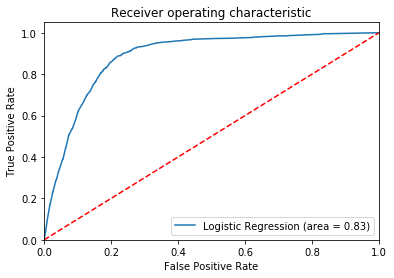

In [306]:
logit_roc_auc = roc_auc_score(y_test, bbc.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, bbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Ensemble balanced Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### SMOTEEN Resampling

In [389]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_train, y_train = smote_enn.fit_sample(X_train, y_train)
print (y.value_counts(), np.bincount(y_resampled.astype(np.int)))

#### Tried applying smoteen but it wasn't helpful in getting good accuracy

### Undersampling

In [454]:
from imblearn.under_sampling import RandomUnderSampler 
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_sample(X_train, y_train)

#### Undesampling the majority class

### 1. SMOTE Oversampling

In [25]:
sm = SMOTE(random_state=22,ratio='minority')

In [290]:
X_res, y_res = sm.fit_sample(X_train, y_train)
# print (y.value_counts(), np.bincount(y_res.astype(np.int)))

### I did oversampling on training data and kept test data as it is

### Feature selection technique

#### Using false positive ratio

In [159]:
from sklearn.feature_selection import SelectFpr
from sklearn.feature_selection import chi2

In [160]:
fpr= SelectFpr(chi2, alpha=0.001)

In [161]:
fpr = fpr.fit(X_train,y_train)

In [162]:
fpr_df=pd.DataFrame({'p_val':fpr.pvalues_,'features':feature_list})

In [163]:
fpr_df.sort_values('p_val',ascending=True)

,features,p_val
104,flag_prodF_customer,6.300443e-114
308,ftr_dummy_idc_verticalsOther,5.786081e-35
335,ftr_dummy_record_typePERSON,9.142658e-32
241,prodG_booking_pct,6.477821e-29
336,ftr_dummy_record_typeUnknown,5.405617e-26
333,ftr_dummy_geo_dunssiteUnknown,1.087076e-23
312,ftr_dummy_idc_verticalsUnknown,2.152215e-23
332,ftr_dummy_geo_dunssiteEMEA,3.864617e-23
256,ftr_dummy_gu_emp_segment_descVery_Small_SMB,9.313107e-23
255,ftr_dummy_gu_emp_segment_descUnknown,8.143681e-22


In [164]:
fpr_df= fpr_df[fpr_df['p_val']<=0.05]

In [165]:
fpr_list=fpr_df['features']

In [167]:
# fpr_list

### Feature selection using Tree classifier

In [113]:
 from sklearn.ensemble import ExtraTreesClassifier

In [114]:
clf_tree = ExtraTreesClassifier()
clf_tree = clf_tree.fit(X_train, y_train)

In [115]:
tree_features = pd.DataFrame({'features':feature_list,'importance':clf_tree.feature_importances_})

In [116]:
tree_features.sort_values('importance',ascending=False)
# # tree_features.sort_values(['importance'], ascending=False)
feature_sel = tree_features[tree_features['importance']>=0.01]
tree_features=feature_sel['features']

In [117]:
tree_features

0                             tot_page_views
3                                 tot_visits
13                           purchase_events
18                 tot_google_browser_visits
19                tot_mozilla_browser_visits
20              tot_microsoft_browser_visits
24                   tot_internal_ref_visits
28                      tot_other_ref_visits
34                        tot_windows_visits
42      tot_first_touch_natural_search_views
44           tot_first_touch_src_codes_views
45              tot_first_touch_direct_views
46            tot_first_touch_internal_views
50       tot_last_touch_natural_search_views
52            tot_last_touch_src_codes_views
53               tot_last_touch_direct_views
56     tot_last_touch_referring_domain_views
57                      tot_store_page_views
91            days_bw_prodG_launch_and_purch
92               total_prodV_bookings_amount
94                       dw_mkt_duns_num_key
95                           num_order_lines
96        

#### Features selected from ExtraTreesClassifier Technique

In [34]:
tree_features= [ 'prodG_booking_pct',  'prodV_booking_pct',  'total_amount',  'total_prodG_booking_amount',  'total_prodV_bookings_amount',  'prodG_2015_bookings_amount',  'tot_microsoft_browser_visits',  'ftr_dummy_db_industryUnknown',  'days_since_last_prodG_purchase_date',  'days_bw_prodG_launch_and_purch',  'days_since_first_prodG_purchase_date',  'channel_web_total',  'ftr_growth_prodG_13_14',  'channel_total',  'tot_apple_browser_visits',  'total_bookings_amount',  'prodG_2014_bookings_amount',  'flag_prodG_customer',  'ftr_dummy_record_typePERSON',  'ftr_growth_prodG_14_15',  'ftr_dummy_idc_verticalsOther',  'purchase_events',  'tot_windows_visits',  'flag_prodF_customer',  'ftr_dummy_db_industrySoftware__Technology',  'prodG_2013_bookings_amount',  'num_order_lines',  'num_orders',  'tot_store_page_views',  'tot_google_browser_visits',  'ftr_dummy_gu_emp_segment_descVery_Small_SMB',  'tot_last_touch_src_codes_views',  'ftr_dummy_idc_verticalsServices',  'ftr_growth_prodG_12_13',  'tot_mozilla_browser_visits',  'ftr_dummy_highest_prodA_editionto1',  'tot_first_touch_natural_search_views',  'tot_internal_ref_visits',  'tot_osx_visits',  'tot_first_touch_direct_views',  'tot_other_ref_visits',  'prodG_2012_bookings_amount',  'tot_last_touch_referring_domain_views', 'tot_page_views',  'ftr_dummy_record_typeORGANIZATION',  'flag_idc_vertical_retail',  'tot_first_touch_src_codes_views',  'tot_visits',  'tot_last_touch_direct_views',  'tot_first_touch_internal_views',  'flag_duns_vertical_retail',]

#### RFE Feature selection:

In [246]:
rfe_reg = RFE(logreg,50, step=2, verbose=0)
rfe_reg = rfe_reg.fit(X_res, y_res)
print(rfe_reg.support_)
print(rfe_reg.ranking_)

[False False False False False False False False False False False False
 False False False False False False False False  True False False False
 False False False False False False False False False  True False False
  True False False False  True False False  True False False False False
  True False  True False  True False False  True False  True False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True False False False  True  True False False
 False False False False False False False False False False False False
 False False False False False False False False False  True False  True
 False False False False  True  True False False False False  True False
 False False False  True False  True False False  True  True  True  True
  True  True False  True False False  True False False  True False False
 False False False False False False False False  T

#### Features selected from RFE selection

In [557]:
RFE_features=[ 'tot_apple_browser_visits',  'tot_windows_visits',  'tot_google_se_visits',  'tot_first_touch_natural_search_views',  'tot_first_touch_direct_views',  'tot_last_touch_natural_search_views',  'tot_last_touch_src_codes_views',  'tot_last_touch_internal_views',  'tot_store_page_views',  'tot_store_vmw_my_group_page_views',  'days_bw_prodG_launch_and_purch',  'num_order_lines',  'num_orders',  'prodA_2013_bookings_amount',  'prodA_2015_bookings_amount',  'prodA_5_x_2015_bookings_amount',  'total_prodB_booking_amount',  'total_prodD_booking_amount',  'total_prodF_booking_amount',  'prodF_2013_bookings_amount',  'total_prodG_booking_amount',  'prodG_2012_bookings_amount',  'prodG_2013_bookings_amount',  'prodG_2014_bookings_amount',  'prodG_2015_bookings_amount',  'total_prodH_booking_amount',  'prodH_2014_bookings_amount',  'prodJ_2014_bookings_amount',  'prodK_booking_amount',  'prodA_std_2013_bookings_amount',  'prodA_ent_2012_bookings_amount',  'total_prodA_ent_plus_booking_amount',  'channel_oem_total',  'channel_web_total',  'days_since_first_prodG_purchase_date',  'days_since_last_prodG_purchase_date',  'prodV_booking_pct',  'prodG_booking_pct',  'ftr_growth_prodA_12_13',  'ftr_growth_prodD_12_13',  'ftr_growth_prodG_12_13',  'ftr_growth_prodG_13_14',  'ftr_growth_prodJ_13_14',  'ftr_growth_prodL_13_14',  'ftr_growth_prodA_14_15',  'ftr_growth_prodF_14_15',  'ftr_growth_prodG_14_15',  'ftr_growth_prodA_5_x_12_13',  'ftr_growth_prodA_ent_13_14',  'ftr_growth_prodA_ent_plus_14_15']

##### Try VIF factore to identify multicollinearity

In [ ]:
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
features = training_df.columns - ['train_period_workstation_purchase_flag']
training_df.reset_index(drop = True, inplace = True)
train_stats = training_df.copy()
train_stats = train_stats.rename(columns={'ftr_dummy_citdb_ent_it_budget2500_.': 'ftr_dummy_citdb_ent_it_budget2500'})
features = train_stats.columns.tolist()

In [ ]:
# features.remove('train_period_workstation_purchase_flag')
str1 = '+'.join(features)

In [ ]:
y, X = dmatrices('train_period_workstation_purchase_flag ~'+ str1, train_stats , return_type = 'dataframe')

In [ ]:
#####Calculate VIF Factors

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [558]:
features_VIF=['tot_page_views_l30d',  'tot_page_views_l90d',  'tot_visits_l30d',  'tot_visits_l90d',  'internal_search_events',  'buy_now_events',  'download_trial_events',  'support_search_events',  'get_pricing_events',  'product_view_events',  'campaign_view_events',  'purchase_events',  'paid_search_events',  'natural_search_events',  'tot_campaign_visits',  'tot_paid_search_visits',  'tot_apple_browser_visits',  'tot_opera_browser_visits',  'tot_other_browser_visits',  'tot_internal_ref_visits',  'tot_search_engine_ref_visits',  'tot_email_ref_visits',  'tot_social_media_ref_visits',  'tot_other_ref_visits',  'tot_prodQ_os_visits',  'tot_android_visits',  'tot_ios_visits',  'tot_winphone_visits',  'tot_blackberry_visits',  'tot_windows_visits',  'tot_linux_visits',  'tot_osx_visits',  'tot_google_se_visits',  'tot_yahoo_se_visits',  'tot_baidu_se_visits',  'tot_msn_se_visits',  'tot_store_page_views',  'tot_store_vmw_upgrade_page_views',  'tot_store_vmw_my_group_page_views',  'tot_store_vmw_login_views',  'tot_store_vmw_support_page_views',  'tot_store_vmw_forgot_passwd_page_views',  'tot_store_workstation_pro_product_page_views',  'tot_store_workstation_player_product_page_views',  'tot_store_fusion_pro_product_page_views',  'tot_store_mirage_product_page_views',  'tot_store_socialcast_product_page_views',  'tot_store_prodE_flex_product_page_views',  'tot_store_prodE_product_page_views',  'tot_store_prodA_essentials_kit_product_page_views',  'tot_store_prodA_editions_product_page_views',  'tot_store_prodD_editions_product_page_views',  'tot_store_prodA_robo_product_page_views',  'tot_store_vcenter_server_editions_page_views',  'tot_store_upgrade_to_fusion_page_views',  'tot_store_upgrade_to_fusion_pro_page_views',  'tot_store_upgrade_to_workstation_pro_page_views',  'tot_store_upgrade_to_workstation_player_page_views',  'tot_store_upgrade_to_prodA_enterprise_plus_page_views',  'tot_store_upgrade_to_prodA_editions_page_views',  'tot_store_upgrade_to_prodD_editions_page_views',  'tot_store_learning_credits_page_views',  'tot_store_vcp_exam_vouchers_trng_page_views',  'tot_store_learning_zone_trng_page_views',  'tot_store_support_pis_fusion_page_views',  'tot_store_support_pis_workstation_pro_page_views',  'tot_store_support_pis_prodA_essentials_page_views',  'tot_store_support_pis_prodA_hypervisor_page_views',  'num_prodA_editions_distinct',  'prodA_qty',  'dw_mkt_duns_num_key',  'num_order_lines',  'num_orders',  'flag_prodA_5_x_customer',  'flag_prodB_customer',  'flag_prodC_customer',  'flag_prodD_customer',  'flag_prodE_customer',  'flag_prodF_customer',  'flag_prodG_customer',  'flag_prodH_customer',  'flag_prodJ_customer',  'flag_prodI_customer',  'flag_prodL_customer',  'flag_prodM_customer',  'flag_prodA_std_customer',  'flag_prodA_ent_customer',  'flag_prodA_ent_plus_customer',  'prodA_2013_bookings_amount',  'prodA_2015_bookings_amount',  'prodA_5_x_2013_bookings_amount',  'prodA_5_x_2015_bookings_amount',  'prodB_2012_bookings_amount',  'prodF_2012_bookings_amount',  'prodF_2015_bookings_amount',  'prodG_2012_bookings_amount',  'prodG_2013_bookings_amount',  'prodG_2014_bookings_amount',  'prodG_2015_bookings_amount',  'prodK_booking_amount',  'num_prodK_orders',  'prodA_std_2012_bookings_amount',  'prodA_std_2013_bookings_amount',  'prodA_std_2014_bookings_amount',  'prodA_std_2015_bookings_amount',  'prodA_ent_2012_bookings_amount',  'prodA_ent_2015_bookings_amount',  'flag_duns_vertical_healthcare',  'flag_idc_vertical_healthcare',  'days_since_last_prodG_purchase_date',  'train_period_workstation_purchase_flag',  'ftr_growth_prodA_12_13',  'ftr_growth_prodG_12_13',  'ftr_growth_prodM_12_13',  'ftr_growth_prodD_13_14',  'ftr_growth_prodG_13_14',  'ftr_growth_prodA_14_15',  'ftr_growth_prodD_14_15',  'ftr_growth_prodF_14_15',  'ftr_growth_prodG_14_15',  'ftr_growth_prodA_5_x_12_13',  'ftr_growth_prodA_std_12_13',  'ftr_growth_prodA_std_13_14',  'ftr_growth_prodA_5_x_14_15',  'ftr_growth_prodA_std_14_15',  'ftr_growth_prodA_ent_14_15']

## Random Forest Classifier and Feature selection

In [192]:
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1,class_weight='balanced')
clf.fit(X_res, y_res)


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [193]:
# features that have an importance of more than 0.15
sfm = SelectFromModel(clf, threshold=0.009)

In [195]:
sfm.fit(X_res, y_res)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
        norm_order=1, prefit=False, threshold=0.009)

In [456]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[10926 18023]
 [   16  1035]]


In [457]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        0.0       1.00      0.38      0.55     28949
        1.0       0.05      0.98      0.10      1051

avg / total       0.97      0.40      0.53     30000



In [196]:
feature_RF=[]

In [197]:
for feature_list_index in sfm.get_support(indices=True):
    feature_RF.append(feature_list[feature_list_index])
    print(feature_list[feature_list_index])

tot_page_views_l90d
tot_visits
tot_visits_l30d
purchase_events
paid_search_events
natural_search_events
tot_windows_visits
tot_linux_visits
tot_store_workstation_player_product_page_views
tot_store_fusion_pro_product_page_views
tot_store_prodE_flex_product_page_views
tot_store_prodE_product_page_views
highest_prodA_edition
flag_prodM_customer
flag_prodA_std_customer
prodA_5_x_2012_bookings_amount


In [218]:
X_important_train = sfm.transform(X_res)
X_important_test = sfm.transform(X_test)

In [219]:
# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1,class_weight='balanced')

In [220]:
# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_res)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [221]:
# Apply The Full Featured Classifier To The Test Data
y_pred = clf_important.predict(X_important_test)
print(confusion_matrix(y_test, y_pred))

[[22483  6467]
 [  131   919]]


In [458]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        0.0       1.00      0.38      0.55     28949
        1.0       0.05      0.98      0.10      1051

avg / total       0.97      0.40      0.53     30000



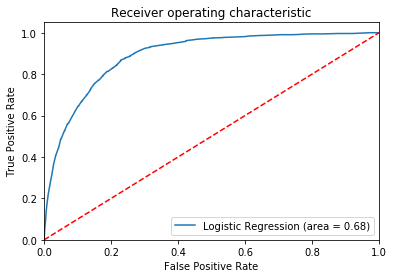

In [459]:
logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [223]:
X_val = validation_df[feature_RF]

In [224]:
# Apply The Full Featured Classifier To The Test Data
y_pred = clf_important.predict(X_val)

In [225]:
print(confusion_matrix(y_val, y_pred))

[[18396 29818]
 [  138  1646]]


In [226]:
print(classification_report(y_val, y_pred))

             precision    recall  f1-score   support

          0       0.99      0.38      0.55     48214
          1       0.05      0.92      0.10      1784

avg / total       0.96      0.40      0.54     49998



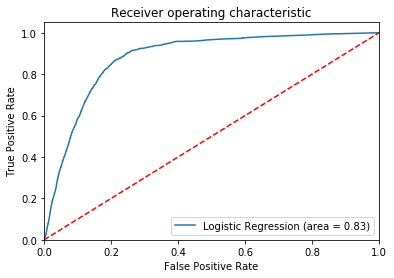

In [228]:
logit_roc_auc = roc_auc_score(y_test, clf_important.predict(X_important_test))
fpr, tpr, thresholds = roc_curve(y_test, clf_important.predict_proba(X_important_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### Normal Logistic Regression

In [514]:
# X_val =validation_df[tree_features]
# X = training_df[tree_features]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# scaler1 = preprocessing.RobustScaler()
# X_train = scaler1.fit_transform( X_train )
# X_test= scaler1.transform( X_test)
# X_val= scaler1.transform( X_val)
# X_res, y_res = sm.fit_sample(X_train, y_train)
# print (y.value_counts(), np.bincount(y_res.astype(np.int)))

In [518]:
logistic = LogisticRegression(random_state=20)

In [523]:
log_normal = logistic.fit(X_res,y_res)

In [534]:
coeff=log_normal.coef_

In [535]:
coeff=coeff.reshape(137,)

In [551]:
normal_logistic = pd.DataFrame({'features':fpr_list,'norm_coeff':coeff})

### Regularised Logistic regression

### Running with Tree paraneters

In [441]:
X_val =validation_df[fpr_list]
X = training_df[fpr_list]

In [442]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler1 = preprocessing.MinMaxScaler()
X_train = scaler1.fit_transform( X_train )
X_test= scaler1.transform( X_test)
X_val= scaler1.transform( X_val)


X_train, y_train = sm.fit_sample(X_train, y_train)
# print (y.value_counts(), np.bincount(y_train.astype(np.int)))

In [56]:
np.logspace(0,4,9)

array([  1.00000000e+00,   3.16227766e+00,   1.00000000e+01,
         3.16227766e+01,   1.00000000e+02,   3.16227766e+02,
         1.00000000e+03,   3.16227766e+03,   1.00000000e+04])

### Create regularization hyperparameter space
### Implement gridsearch for parameter tuning

In [444]:
from sklearn.model_selection import GridSearchCV
C =np.logspace(0,4,9)

penalty =['l1']

# Create hyperparameter options

hyperparameters = dict(C=C, penalty=penalty)
logreg = LogisticRegression(penalty='l1',tol=0.01,class_weight='balanced', random_state=42)
clf_CV =  GridSearchCV(logreg, hyperparameters, cv=5, verbose=0)
best_model = clf_CV.fit(X_res,y_res)


    

    

In [445]:
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l1
Best C: 100.0


#### Run regression again with the hyperparameter found using grid serach

When regularization parameter C is : 100
Coefficient of each feature: [[ -2.28846033e+00  -2.12398523e+00   1.11279305e+00   5.44360406e+00
   -8.61641433e-01  -9.40093282e+00  -3.31564985e-01   1.81312915e+00
    3.39353388e+00   4.91252416e+00   9.14016678e+00  -1.81072834e+00
    1.31214461e-01  -2.87576689e-01   4.46595528e-02   4.79942645e+00
   -5.36198221e-01   3.99494186e-01   4.52160962e-01   0.00000000e+00
   -3.11112236e+00   0.00000000e+00   9.56788535e-01   1.03303992e+00
    0.00000000e+00   0.00000000e+00  -1.90680463e-02   0.00000000e+00
    0.00000000e+00   3.05698414e-01   0.00000000e+00  -4.76460574e+00
   -1.04866410e+00   0.00000000e+00   5.42004764e+01   8.32612069e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   -1.01845561e-01   0.00000000e+00   0.00000000e+00  -3.25008127e-02
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   -2.61615237e-01  

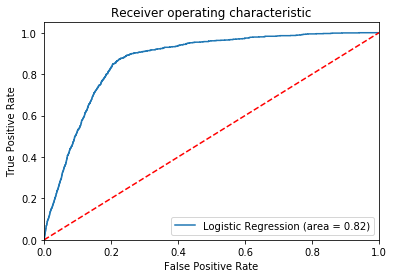

In [537]:
logreg = LogisticRegression(penalty='l1',C=32,tol=0.1,class_weight='balanced', random_state=42)
logreg.fit(X_res, y_res)
y_pred = logreg.predict(X_test)
y_pred_val = logreg.predict(X_val)
print('When regularization parameter C is :', 100)
print('Coefficient of each feature:', logreg.coef_)
print('Training accuracy:', logreg.score(X_res, y_res))
print('Test accuracy:', logreg.score(X_test, y_test))
print('Validation accuracy:', logreg.score(X_val, y_val))
print("Report for validation")
print(classification_report(y_val, y_pred_val))
print("Report for test")
print(classification_report(y_test, y_pred))

print('ROC-AUC for validation set')
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.savefig('Log_ROC')
plt.show()
print('')

In [539]:
reg_log= logreg.coef_

In [543]:
reg_log=reg_log.reshape(137,)

In [550]:
reg_logistic = pd.DataFrame({'features':fpr_list,'reg_coef':reg_log})

In [552]:
compare_coeff = pd.merge(reg_logistic, normal_logistic, on='features')

In [559]:
compare_coeff.head(20)

,features,reg_coef,norm_coeff
0,buy_now_events,-2.288460,-0.624149
1,product_view_events,-2.123985,-0.462336
2,purchase_events,1.112793,1.056374
3,tot_last_touch_src_codes_views,5.443604,0.711809
4,tot_store_page_views,-0.861641,0.458519
5,tot_store_vmw_upgrade_page_views,-9.400933,-0.510224
6,tot_store_workstation_pro_product_page_views,-0.331565,0.012912
7,tot_store_workstation_player_product_page_views,1.813129,0.063480
8,tot_store_upgrade_to_fusion_pro_page_views,3.393534,-0.025465
9,tot_store_upgrade_to_workstation_pro_page_views,4.912524,0.275600


In [565]:
from scipy import stats  
reg_log=np.array(compare_coeff['reg_coef'])
norm_log=np.array(compare_coeff['norm_coeff'])
f_val, p_val = stats.f_oneway(reg_log, norm_log)  
  
print ("One-way ANOVA P =", p_val)

One-way ANOVA P = 0.103749225059


### As P > 0.05, we can claim with high confidence that the means of the results of normal and regularized logistic regression are not significantly different.

### When C=1

When regularization parameter C is : 1


Coefficient of each feature: [[ -3.14162190e-01   5.09919471e-01  -9.51418780e-05   3.62566728e-02
    3.78920891e-05  -7.61386522e-03  -8.68195890e-03  -5.51092747e-02
   -3.59775771e-01   5.38498950e-02   4.33798506e-02   1.85130662e-02
    9.84150390e-03  -3.21422222e-05  -3.09753386e-01  -9.23814671e-05
    1.97860173e-02   2.47612709e+00   3.20110474e-02   2.53359484e-03
    2.42547000e-01  -1.18139432e-01   1.19564951e-02   2.76439574e-01
   -2.83513364e-01   4.71441774e-03  -2.65014164e-04   1.42616145e-01
    1.20905816e-02  -1.18369940e-02  -3.22890505e-01  -2.38608288e-03
    5.03359519e-02  -1.19132256e-02  -2.05586939e-02  -1.06304720e-01
    7.17280842e-04   6.85818481e-03   3.16084203e-02   3.62608040e-05
   -8.15953824e-03  -3.14863660e-04   5.57104579e-05   1.74146266e-03
    1.58675399e-02   3.58334791e-01  -1.85830398e-02  -7.92467879e-03
    7.31091381e-04  -1.25605166e-03  -2.17031914e-01]]
Training accuracy: 0.827757216876
T

c:\users\harish\anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


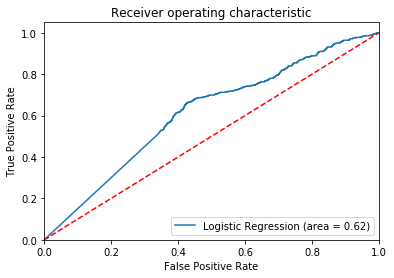

In [140]:
logreg1 = LogisticRegression(penalty='l1',C=1,tol=0.1,class_weight='balanced', random_state=42)
logreg1.fit(X_res, y_res)
y_pred = logreg1.predict(X_test)
y_pred_val = logreg1.predict(X_val)
print('When regularization parameter C is :', 1)
print('\n')
print('Coefficient of each feature:', logreg1.coef_)
print('Training accuracy:', logreg1.score(X_res, y_res))
print('Test accuracy:', logreg1.score(X_test, y_test))
print('Validation accuracy:', logreg1.score(X_val, y_val))
print("Report for validation")
print(classification_report(y_val, y_pred_val))
print("Report for test")
print(classification_report(y_test, y_pred))

print('ROC-AUC for validation set')
logit_roc_auc = roc_auc_score(y_val, logreg1.predict(X_val))
fpr, tpr, thresholds = roc_curve(y_val, logreg1.predict_proba(X_val)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print('')


### When C=0.001

When regularization parameter C is : 0.001
Coefficient of each feature: [[  7.45634952e-02  -1.46460555e-01   5.93534426e-01   0.00000000e+00
    1.40715317e-01   3.20978937e-02   0.00000000e+00   0.00000000e+00
   -2.08209433e-01  -2.44016263e-02   1.99254902e-02  -1.01881389e-01
    0.00000000e+00  -1.67412267e-03   0.00000000e+00   0.00000000e+00
   -5.49805330e-04   0.00000000e+00   2.15053770e-02  -1.15404907e-03
    0.00000000e+00   0.00000000e+00  -1.59226260e-03   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00  -7.32013286e-04   0.00000000e+00
    3.34841849e-04   0.00000000e+00   0.00000000e+00   7.10631857e-02
   -2.08324151e-06  -8.95035967e-05   5.05010696e-04   0.00000000e+00
   -5.24076804e-04   6.60296243e-04   0.00000000e+00   1.41464108e-04]]
Training accuracy: 0.818837897853
Test accuracy: 0.794733333333
Validation accuracy: 0

c:\users\harish\anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


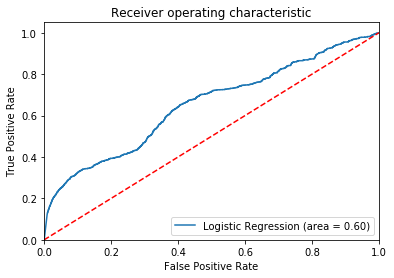

In [51]:
logreg = LogisticRegression(penalty='l1',C=0.001,tol=0.1,class_weight='balanced', random_state=42)
logreg.fit(X_res, y_res)
y_pred = logreg.predict(X_test)
y_pred_val = logreg.predict(X_val)
print('When regularization parameter C is :', 0.001)
print('Coefficient of each feature:', logreg.coef_)
print('Training accuracy:', logreg.score(X_res, y_res))
print('Test accuracy:', logreg.score(X_test, y_test))
print('Validation accuracy:', logreg.score(X_val, y_val))
print("Report for validation")
print(classification_report(y_val, y_pred_val))
print("Report for test")
print(classification_report(y_test, y_pred))

print('ROC-AUC for validation set')
logit_roc_auc = roc_auc_score(y_val, logreg.predict(X_val))
fpr, tpr, thresholds = roc_curve(y_val, logreg.predict_proba(X_val)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print('')

### LASSO Techniques to check the influence on parameter when alpha is set to 0

In [72]:
from sklearn.linear_model import Lasso

In [99]:
names = feature_list

In [100]:
def lasso(alphas):
  
    df = pd.DataFrame()
    
    # Create a column of feature names
    df['Feature Name'] = names
    
    # For each alpha value in the list of alpha values,
    for alpha in alphas:
        # Create a lasso regression with that alpha value,
        lasso = Lasso(alpha=alpha)
        
        # Fit the lasso regression
        lasso.fit(X_train, y_train)
        
        # Create a column name for that alpha value
        column_name = 'Alpha = %f' % alpha

        # Create a column of coefficient values
        df[column_name] = lasso.coef_
        
    # Return the datafram    
    return df

In [102]:
# Run the function called, Lasso
lasso([0,1])

c:\users\harish\anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
c:\users\harish\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
c:\users\harish\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


,Feature Name,Alpha = 0.000000,Alpha = 1.000000
0,tot_page_views,6.719517e-05,0.0
1,tot_page_views_l30d,-1.251901e-04,0.0
2,tot_page_views_l90d,1.193672e-04,0.0
3,tot_visits,-5.157667e-03,0.0
4,tot_visits_l30d,2.302273e-03,0.0
5,tot_visits_l90d,-1.370754e-03,0.0
6,internal_search_events,-1.959987e-03,-0.0
7,buy_now_events,1.118084e-02,0.0
8,download_trial_events,1.699674e-02,0.0
9,support_search_events,-1.791405e-02,-0.0


### Boosting Techniques

#### ADA Boosting

In [142]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [143]:
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [100, 200]
             }

In [145]:
DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto", class_weight = "balanced",max_depth = None)

ada_clf= AdaBoostClassifier(base_estimator = DTC)


# run grid search
grid_search_ada = GridSearchCV(ada_clf, param_grid=param_grid, scoring = 'roc_auc')
best_model = grid_search_ada.fit(X_res,y_res)

In [146]:
# View best hyperparameters
print('Best Param:', best_model.best_estimator_.get_params())

# print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Param: {'algorithm': 'SAMME.R', 'base_estimator__class_weight': 'balanced', 'base_estimator__criterion': 'entropy', 'base_estimator__max_depth': None, 'base_estimator__max_features': 'auto', 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_impurity_split': None, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__presort': False, 'base_estimator__random_state': 11, 'base_estimator__splitter': 'random', 'base_estimator': DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=11,
            splitter='random'), 'learning_rate': 1.0, 'n_estimators': 100, 'random_state':

In [147]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy',class_weight='balanced',random_state=11),n_estimators=100,algorithm="SAMME.R",learning_rate=1,random_state=11)

In [148]:
ada_clf.fit(X_res,y_res)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=11,
            splitter='best'),
          learning_rate=1, n_estimators=100, random_state=11)

In [149]:
y_pred= ada_clf.predict(X_test)
y_pred_val = ada_clf.predict(X_val)

In [150]:
ada_clf.feature_importances_

c:\users\harish\anaconda3\lib\site-packages\sklearn\tree\tree.py:508: RuntimeWarning: invalid value encountered in true_divide
  return self.tree_.compute_feature_importances()


array([  2.77396610e-03,   9.50235176e-05,   2.20610349e-03,
        -6.52632889e-02,   2.33734949e-02,   2.23210822e-04,
         1.74418604e-03,              nan,   1.34714211e-01,
        -5.70105422e-03,              nan,   1.15226074e-01,
         1.77107369e-04,   3.00923583e-02,   3.87157509e-03,
         1.01243297e-02,   1.22705688e-02,   1.05894819e-05,
         5.33856023e-04,   1.57855589e-04,   3.85677007e-04,
         7.00082953e-04,              nan,   4.74454443e-05,
         1.74109659e-04,   2.21737069e-04,  -9.84133018e-03,
                    nan,   9.51149573e-03,   6.63698845e-04,
         4.95004371e-04,   2.12519258e-02,   3.01374265e-04,
         1.47530828e-04,   3.00070418e-04,   4.50253343e-05,
         1.03888950e-02,   1.87191746e-04,   4.39726217e-03,
        -5.41484428e-02,   5.07705774e-05,   9.93304942e-05,
         2.73376602e-04,              nan,   7.27928741e-04,
         9.32771472e-05,   1.87868058e-04,   4.27749663e-05,
         2.48269070e-04,

In [151]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.97      0.98      0.97     28949
          1       0.17      0.14      0.15      1051

avg / total       0.94      0.95      0.94     30000



In [152]:
print(classification_report(y_val, y_pred_val))

             precision    recall  f1-score   support

          0       0.97      0.82      0.89     48214
          1       0.06      0.32      0.10      1784

avg / total       0.94      0.80      0.86     49998



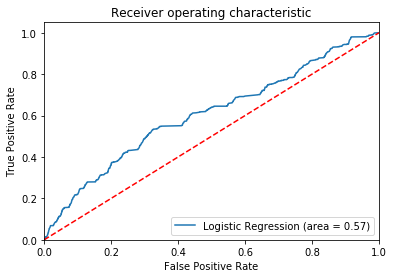

In [153]:
logit_roc_auc = roc_auc_score(y_val, ada_clf.predict(X_val))
fpr, tpr, thresholds = roc_curve(y_val, ada_clf.predict_proba(X_val)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### Gradient Boosting

In [258]:
# Load libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search


In [314]:
def modelfit(GDB_alg,X_res,y_res,predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    GDB_alg.fit(X_res,y_res)
        
    #Predict training set:
    y_pred = GDB_alg.predict(X_res)
    y_predprob = GDB_alg.predict_proba(X_res)[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(GDB_alg, X_res, y_res, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
#     print ("Accuracy : %.4g" % metrics.accuracy_score(y_res.values, y_pred))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_res, y_predprob))
    
    if performCV:
        print( "CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(GDB_alg.feature_importances_,predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances',ax = plt.gca())
        plt.ylabel('Feature Importance Score')


Model Report
AUC Score (Train): 0.937542
CV Score : Mean - 0.9032395 | Std - 0.005625369 | Min - 0.8922741 | Max - 0.9076801


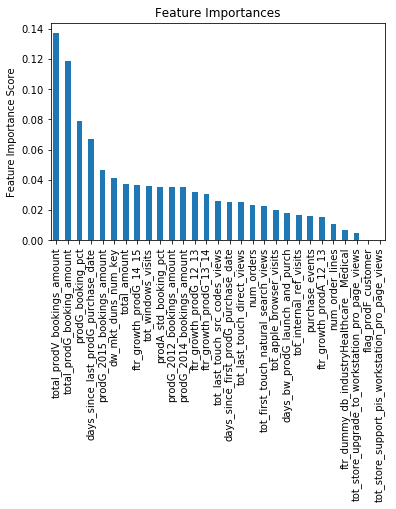

In [315]:
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, X_res,y_res,gbm_list)

In [270]:
# imp =pd.Series(gbm0.feature_importances_,feature_list)
imp=pd.DataFrame({'importance':gbm0.feature_importances_, 'features':feature_list})

In [271]:
imp.head()

,features,importance
0,tot_page_views,0.001557
1,tot_page_views_l30d,0.005091
2,tot_page_views_l90d,0.005515
3,tot_visits,0.001308
4,tot_visits_l30d,0.001547


In [278]:

select_feat = imp[imp['importance']>=0.009]


In [281]:
gbm_list = imp['features'].tolist()

In [282]:
gbm_list

['total_prodV_bookings_amount',
 'days_since_last_prodG_purchase_date',
 'total_prodG_booking_amount',
 'prodG_booking_pct',
 'tot_windows_visits',
 'prodG_2015_bookings_amount',
 'prodG_2014_bookings_amount',
 'ftr_growth_prodG_12_13',
 'prodG_2012_bookings_amount',
 'ftr_growth_prodG_14_15',
 'total_amount',
 'tot_store_upgrade_to_workstation_pro_page_views',
 'purchase_events',
 'ftr_growth_prodG_13_14',
 'tot_last_touch_src_codes_views',
 'dw_mkt_duns_num_key',
 'prodA_std_booking_pct',
 'days_since_first_prodG_purchase_date',
 'tot_last_touch_direct_views',
 'tot_apple_browser_visits',
 'ftr_dummy_db_industryHealthcare__Medical',
 'days_bw_prodG_launch_and_purch',
 'tot_internal_ref_visits',
 'flag_prodF_customer',
 'tot_store_support_pis_workstation_pro_page_views',
 'tot_first_touch_natural_search_views',
 'num_order_lines',
 'ftr_growth_prodA_12_13',
 'num_orders']

In [316]:
y_pred = gbm0.predict(X_test)
y_pred_val = gbm0.predict(X_val)

print('Test accuracy:', gbm0.score(X_test, y_test))
print('Validation accuracy:', gbm0.score(X_val, y_val))
print("Report for validation")
print(classification_report(y_val, y_pred_val))
print("Report for test")
print(classification_report(y_test, y_pred))



Test accuracy: 0.7897
Validation accuracy: 0.216948677947
Report for validation
             precision    recall  f1-score   support

          0       0.98      0.19      0.32     48214
          1       0.04      0.88      0.07      1784

avg / total       0.94      0.22      0.31     49998

Report for test
             precision    recall  f1-score   support

        0.0       1.00      0.79      0.88     28950
        1.0       0.13      0.89      0.23      1050

avg / total       0.96      0.79      0.86     30000



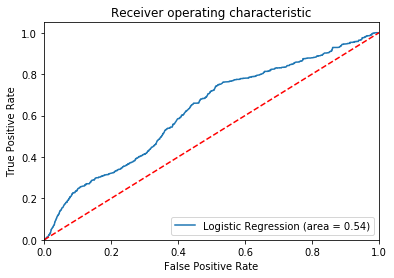

In [317]:
logit_roc_auc = roc_auc_score(y_val, gbm0.predict(X_val))
fpr, tpr, thresholds = roc_curve(y_val, gbm0.predict_proba(X_val)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## LIFT Chart

In [475]:
import matplotlib.pyplot as plt
import scikitplot as skplt
X_val =validation_df[gbm_list]
X = training_df[gbm_list]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform( X_train )
X_test= scaler.transform( X_test)
X_val= scaler.transform( X_val)
y_probas = gbm0.predict_proba(X_test)

In [476]:
probas_y=y_probas[:,1]

In [506]:
def liftTable(actual,predicted,value):
    df = pd.DataFrame({'actual': actual, 'pred_prob': predicted})
    df.sort_values('pred_prob',ascending=False)
    
    n_positives = df['actual'].sum()
    n_obs = df.shape[0]
    # baseline with a random classifier
    baseline = n_positives / float(n_obs)

    df['bin'] = pd.qcut(df['pred_prob'], q=value,labels=None, retbins=False, precision=3)#,duplicates='drop')
    grouped_df = df.groupby('bin')
    lift_positive = grouped_df['actual'].sum() / grouped_df['actual'].count()
    lift_index = (lift_positive/baseline)*100
    
    lift_df = pd.DataFrame({'lift_positive':lift_positive,
                            'lift_index':lift_index,
                            'baseline':baseline})
    lift_df.reset_index(drop = True, inplace = True)
    lift_df = lift_df.sort_values('lift_positive',ascending=False)
    return lift_df


In [495]:
def plotLiftChart(actual, predicted):
    df_dict = {'actual': list (actual), 'pred': list(predicted)}
    df = pd.DataFrame(df_dict)
    df = df.sort_values('pred',ascending=False)
    pred_ranks = pd.qcut(df['pred'].rank(method='first'), 200, labels=False)
    actual_ranks = pd.qcut(df['actual'].rank(method='first'), 200, labels=False)
    pred_percentiles = df.groupby(pred_ranks).mean()
    pred_percentiles = pred_percentiles.sort_values('pred',ascending=False)
    actual_percentiles = df.groupby(actual_ranks).mean()
    plt.title('Lift Chart')
    plt.plot(np.arange(.01, 2.01, .01), np.array(pred_percentiles['pred']),
             color='darkorange', lw=2, label='Prediction')
    plt.plot(np.arange(.01, 2.01, .01), np.array(pred_percentiles['actual']),
             color='navy', lw=2, linestyle='--', label='Actual')
    plt.ylabel('Target Percentile')
    plt.xlabel('Population Percentile')
    plt.xlim([0.0, 1.0])
    plt.ylim([-0.05, 1.05])
    plt.legend(loc="best")

In [490]:
liftTable(y_test,probas_y,4)

,baseline,lift_index,lift_positive
3,0.035033,328.449096,0.115067
2,0.035033,56.707897,0.019867
1,0.035033,11.426839,0.004003
0,0.035033,3.422571,0.001199


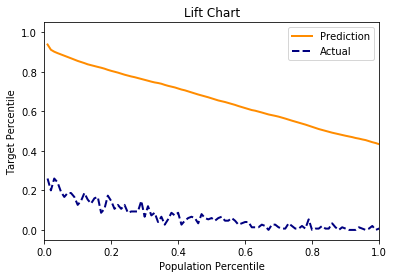

In [496]:
plotLiftChart(y_test,probas_y)

#### Logistic Regression

In [507]:
X_val =validation_df[fpr_list]
X = training_df[fpr_list]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform( X_train )
X_test= scaler.transform( X_test)
X_val= scaler.transform( X_val)


In [508]:
y_probas = logreg.predict_proba(X_test)
y_probas=y_probas[:,1]

In [513]:
liftTable(y_test,y_probas,100)

,baseline,lift_index,lift_positive
99,0.035033,742.150333,0.260000
94,0.035033,570.884872,0.200000
98,0.035033,475.737393,0.166667
96,0.035033,475.737393,0.166667
93,0.035033,475.737393,0.166667
97,0.035033,456.707897,0.160000
92,0.035033,428.163654,0.150000
85,0.035033,428.163654,0.150000
89,0.035033,418.648906,0.146667
95,0.035033,409.134158,0.143333


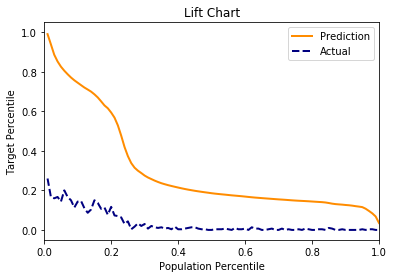

In [451]:
plotLiftChart(y_test,y_probas)

#### Random Forest Classifier

In [483]:
X_val =validation_df[fpr_list]
X = training_df[fpr_list]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform( X_train )
X_test= scaler.transform( X_test)
X_val= scaler.transform( X_val)

In [484]:
y_probas = clf.predict_proba(X_test)
y_probas=y_probas[:,1]

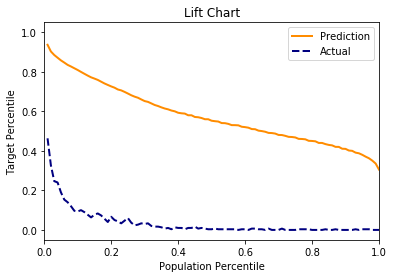

In [485]:
plotLiftChart(y_test,y_probas)

In [486]:
liftTable(y_test,y_probas,4)

,baseline,lift_index,lift_positive
3,0.035033,346.002366,0.121216
2,0.035033,43.078328,0.015092
1,0.035033,7.841825,0.002747
0,0.035033,3.804885,0.001333
